## Datos numéricos y categóricos

Normalmente usados para explorar/describir 

#### ¿Cuánto espacio de mi universo muestral ocupa cierta categoria/grupo conforme a mis datos?

La gráfica más choteada (Definir choteada en todos los países) es la Bar Graph o Bar Plot o por ejemplo seaborn le dice CountPlot y ésta es la version Categorica de un histograma 🤓

> A bar graph shows comparisons among discrete categories.



> Wikipedia

### BARCHART

In [ ]:
import pandas as pd
import numpy as np

import json
import datetime
import math

from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import seaborn as sns

In [ ]:
df = pd.read_pickle('data/sydney.pkl')
df.shape
df

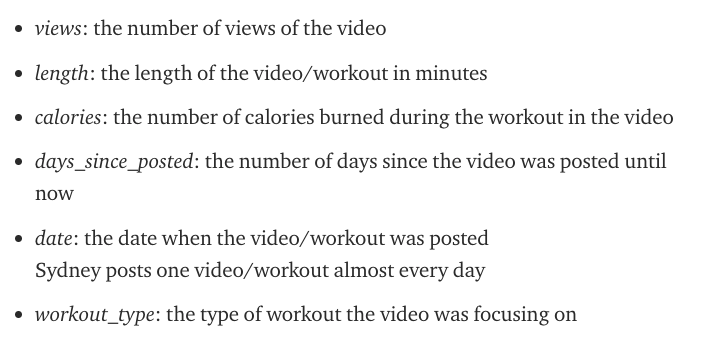

In [ ]:
df_non_numeric = df.select_dtypes(exclude='number')
df_non_numeric
plt.figure(figsize=(25,7))
sns.countplot(x="area",
            data=df_non_numeric)

In [ ]:
df_non_numeric.info()

In [ ]:
# this plots multiple seaborn countplots on different subplots.
# 
def plot_multiple_countplots(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                sns.countplot(x=df[col], ax=axs)
            else:
                sns.countplot(x=df[col], ax=axs[j])
        else:
            sns.countplot(x=df[col], ax=axs[i, j])
            
            
plot_multiple_countplots(df_non_numeric, ['is_butt_area', 'is_upper_area', 'is_cardio_workout', 'is_strength_workout'])

### Relación entre 2 Variables Categóricas

> Cuales son los tipos de entrenamiento por área más populares en el canal?

In [ ]:
df.groupby(['area', 'workout_type']).size()

In [ ]:
top6 = list(df['area'].value_counts().index[:5])
df['area2'] = df['area']

print(top6)

top4 = list(df['workout_type'].value_counts().index[:3])
df['workout_type2'] = df['workout_type']

print(top4)

msk = df['area2'].isin(top6)
df.loc[~msk, 'area2'] = 'Other'

msk = df['workout_type2'].isin(top4)
df.loc[~msk, 'workout_type2'] = 'Other'

In [ ]:
df

In [ ]:
order = df['area2'].value_counts().index # order the columns from highest count to lowest.
g = sns.catplot(x="workout_type2",
            col='area2',
            col_order=order,
            kind="count", data=df,
            aspect=0.5)

#### A ver nomás por acordarnos...
### Scatter

> Cuál sería la mejor duración de videos para obtener más vistas?

In [ ]:
sns.relplot(x='length', y='views', data=df, aspect=2.0)

### BOXPLOTS

> A box plot (box-and-whisker plot) is a standardized way of displaying the dataset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.


> are useful visualizations when comparing groups of categories together.



>Wikipedia

In [ ]:
to_replace = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_week_num'] = df['date'].dt.dayofweek
df['day_of_week'] = df['day_of_week_num'].replace(to_replace=to_replace)

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.boxplot(x="day_of_week", y="views", data=df, order=order)

In [ ]:
msk = df['views'] < 400000
sns.boxplot(x="day_of_week", y="views", data=df[msk], order=order)

#### En algunos días de la semana incrementan las vistas por tipo de entrenamiento?

#### 2 Variables categorica y una numerica

In [ ]:
sns.catplot(x="workout_type", y="views",
            col="day_of_week", aspect=.6,
            kind="boxen", data=df[msk], col_order=order);

In [ ]:
df['workout_type'].value_counts()


In [ ]:
top4 = list(df['workout_type'].value_counts().index[:3])
df['workout_type2'] = df['workout_type']

msk = df['workout_type2'].isin(top4)
df.loc[~msk, 'workout_type2'] = 'Other'

In [ ]:

msk = df['views'] < 400000

sns.catplot(x="workout_type2", y="views",
            col="day_of_week",
            kind="box", data=df[msk], col_order=order,
            aspect=0.6)

### STRIPPLOT

> A swarm plot is a categorical scatterplot where the points are adjusted (only along the categorical axis) so that they don’t overlap.


> This gives a better representation of the distribution of values.



>seaborn documentation

In [ ]:
sns.stripplot(x="day_of_week", y="views", data=df[msk], order=order)

### Heatmaps

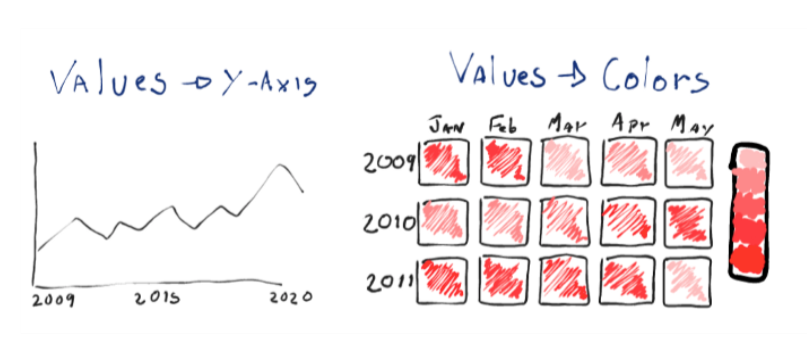

In [ ]:
df_area_workout = df.groupby(['area', 'workout_type'])['views'].count().reset_index()
df_area_workout_pivot = df_area_workout.pivot(index='area', columns='workout_type', values='views').fillna(0)
sns.heatmap(df_area_workout_pivot, annot=False, fmt='.0f', cmap="YlGnBu")

In [ ]:
# read file
dolar = pd.read_csv('data/Foreign_Exchange_Rates.csv', 
                 usecols=[1,7], names=['DATE', 'CAD_USD'], 
                 skiprows=1, index_col=0, parse_dates=[0])
dolar

In [ ]:
dolar['CAD_USD'] = pd.to_numeric(dolar.CAD_USD, errors='coerce')
dolar.dropna(inplace=True)
dolar

In [ ]:
# create a copy of the dataframe, and add columns for month and year
dolar_m = dolar.copy()
dolar_m['month'] = [i.month for i in dolar_m.index]
dolar_m['year'] = [i.year for i in dolar_m.index]
# group by month and year, get the average
dolar_m = dolar_m.groupby(['month', 'year']).mean()
dolar_m

In [ ]:
dolar_m = dolar_m.unstack(level=0)
dolar_m

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dolar_m)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sns.heatmap(dolar_m, cmap="Blues", vmin= 0.9, vmax=1.65,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

In [ ]:
# xticks

ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)


# axis labels
plt.xlabel('')
plt.ylabel('')

# title
title = 'monthly Average exchange rate\nValue of one USD in CAD\n'.upper()
plt.title(title, loc='left')

plt.show()

### HeatMap como Matriz de Correlación

!['dwight_correlation'](https://media.makeameme.org/created/correlation-implies-causation-17eb876840.jpg)


In [ ]:
df = pd.read_csv('data/cereal.csv')
# get correlations
df_corr = df.corr()
df_corr
# irrelevant fields
fields = ['rating', 'shelf', 'cups', 'weight']
# drop rows
df_corr.drop(fields, inplace=True)
# drop cols
df_corr.drop(fields, axis=1, inplace=True)
df_corr

In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, mask=mask, cbar_kws={"shrink": .8})
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [ ]:
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, linewidths=5,
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,8))
sns.kdeplot(df.potass, df.fiber, cmap='Blues',
           shade=True, clip=(-1,300))
plt.scatter(df.potass, df.fiber, color='orangered')

### Dendograma

> El objetivo es agrupar las entidades para mostrar quién comparte similitudes con quién.


> El dendrograma acercará las entidades similares entre sí en el árbol.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

In [ ]:
data = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')
data

In [ ]:
Z = linkage(data, 'centroid')
Z

In [ ]:
# Plot title
plt.title('Dendograma de clusterización Jerarquico')

# Plot axis labels
plt.xlabel('')
plt.ylabel('Distance thru (Centroide)')

# Make the dendrogram
dendrogram(Z, labels=data.index, leaf_rotation=90)

# Show the graph
plt.show()

In [ ]:
# method 1: lastp
hierarchy.dendrogram(Z, labels=data.index, truncate_mode = 'lastp', p=4 ) # -> you will have 4 leaf at the bottom of the plot
plt.show()

In [ ]:
hierarchy.dendrogram(Z, labels=data.index, truncate_mode = 'level', p=2) # -> No more than ``p`` levels of the dendrogram tree are displayed.
plt.show()

In [ ]:
hierarchy.dendrogram(Z, orientation="right", labels=data.index)
plt.show()


### Treemap

Fue creado en los 90's por 

#### Ben Shneiderman profe de la universidad de Maryland


> Ees una visualización basada en rectángulos que le permite representar un conjunto de datos ordenado jerárquicamente (estructurado en árbol). 


> La idea conceptual es comparar cantidades y mostrar patrones de alguna estructura jerárquica en un espacio físicamente restringido. Para ello, se utilizan rectángulos de diferentes tamaños y colores para mostrar el conjunto de datos desde diferentes perspectivas.

![ben_treemap](https://miro.medium.com/max/1400/0*p_uZc3SKPn49_AzL.jpeg)

In [ ]:
!pip install squarify

In [ ]:
import squarify

In [ ]:
animals = pd.read_csv('data/animals.csv')
# convert to numeric and drop na
animals['Number of Animals'] = pd.to_numeric(animals['Number of Animals'], errors='coerce')
animals.dropna(inplace=True)
animals.head()
animals.info()

In [ ]:
fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=animals['Number of Animals'], 
              label=animals['Breed'], 
              alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
animals.sort_values('Number of Animals', ascending=False, inplace=True)
animals

In [ ]:
fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=animals['Number of Animals'], 
              label=animals['Breed'][:15], 
              alpha=.8, text_kwargs={'fontsize':7} )
plt.axis('off')
plt.show()

In [ ]:
nasdaq = pd.read_csv('https://raw.githubusercontent.com/hashABCD/Publications/main/Medium/Treemap%20in%20python/market_cap_top20.csv')
nasdaq.head()

In [ ]:
nasdaq['Market Cap']=nasdaq['Market Cap'].apply(lambda x: float(str(x).replace('B','')))
nasdaq.Change=nasdaq.Change.apply(lambda x:float(str(x).replace('%','')))
nasdaq.Volume=nasdaq.Volume.apply(lambda x:int(str(x).replace(',','')))

In [ ]:
plt.figure(figsize=(8,6))
squarify.plot(nasdaq['Market Cap'], label=nasdaq.Ticker, alpha=0.5, pad=True)
plt.axis('off')
plt.show()

In [ ]:
cmap=matplotlib.cm.RdYlGn
norm=matplotlib.colors.Normalize(vmin=nasdaq.Change.min(), vmax=nasdaq.Change.max())
colors=[cmap(norm(i)) for i in nasdaq.Change]

In [ ]:
plt.figure(figsize=(14,8))
title='NASDAQ Top 20, Size: Market Cap, Color: Change(%)'
plt.title(title, size=20)

squarify.plot(nasdaq['Market Cap'], label=nasdaq.Ticker,alpha=0.8, color=colors, pad=True, 
              text_kwargs={'color':'black', 'size':12})

plt.axis('off')
plt.show()

In [ ]:
!pip install plotly

In [ ]:
!pip install "jupyterlab>=1.0" jupyterlab-dash==0.1.0a3


In [ ]:
import plotly.express as px

In [ ]:
vgsales = pd.read_csv('data/vgsales.csv')
vgsales.dropna(inplace=True)
vgsales

In [ ]:
fig = px.treemap(vgsales, 
                 path=['Platform', 'Genre'], 
                 values='Global_Sales',
                 color='NA_Sales'
                )
fig.show()

In [ ]:
import plotly.express as px
fig = px.treemap(
    names = ["Eve","Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents = ["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve"]
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### WORDCLOUD

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
# Create a list of word
text=("Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
import numpy as np
from PIL import Image
from os import path
import os
import random

In [ ]:

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [ ]:
d = os.getcwd()
d

In [ ]:
mask = np.array(Image.open(path.join(d, "assets/stormtrooper_mask.png")))

In [ ]:
text = open(path.join(d, 'data/a_new_hope.txt')).read()
text

In [ ]:
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [ ]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)

In [ ]:
default_colors = wc.to_array()
plt.grid(False)
plt.axis("off")
plt.title("Escala de Grises")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")

In [ ]:
wc.to_file("Episode4.png")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import collections
import csv
import datetime

import tweepy
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
# Pass OAuth details to tweepy's OAuth handler

%store -r access_token
%store -r access_token_secret
%store -r api_key
%store -r api_key_secret

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)

In [ ]:
search_term = "#elon+musk -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2021-05-01').items(500)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

In [ ]:
all_tweets_no_urls[0].lower().split()

In [ ]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet

In [ ]:
all_words_no_urls = list(itertools.chain(*words_in_tweet))
all_words_no_urls


In [ ]:
sentence = ' '.join(all_words_no_urls)
sentence

In [ ]:
mask = np.array(Image.open(path.join(d, "Bitcoin.png")))

In [ ]:
wc_elon = WordCloud(max_words=100000, mask=mask, margin=10,
               random_state=1).generate(sentence)

In [ ]:
default_colors = wc_elon.to_array()
plt.title("Crypto Tweets")
plt.imshow(wc_elon.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")